# Load library and Read Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!pip install pyitlib

In [0]:
import os
os.path.abspath(os.getcwd())
os.chdir('/content/drive/My Drive/Protein project/data folder')
os.path.abspath(os.getcwd())
from __future__ import division ###for float operation
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score ##tp / (tp + fn)
from sklearn.metrics import precision_score #tp / (tp + fp)
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
from pyitlib import discrete_random_variable as drv
import time 
import timeit 
import networkx as nx
import matplotlib.pyplot as plt 
from patsy import dmatrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
your_module = drive.CreateFile({'id':'14_Wk3mGMp53nEiSjMUkeCno_LvRtyQBH'})
your_module.GetContentFile('Bayesian_class.py')
from Bayesian_class import *

In [0]:
def readData(filename):
	fr = open(filename)
	returnData = []
	headerLine=fr.readline()###move cursor 
	for line in fr.readlines():
		lineStrip = line.strip().replace('"','')
		lineList =	lineStrip.split('\t')
		returnData.append(lineList)###['3','2',...]
	return returnData

"""first case P450 = [['1','1',....],[],[].....,[]]  second case P450 = array([['1','1',....],[],[].....,[]]), third case P450 = """
P450 = readData('P450.txt') ### [[],[],[],....[]]
P450 = np.array(P450) ### either [['1','1',....],[],[].....,[]] or array([['1','1',....],[],[].....,[]]) works, but note that keys are '1', '0' 
#P450 = P450.astype(int) ### for shap array [[1,1,....],[],[].....,[]], keys are 1, 0 

M1=np.matrix([[245,   9,   0,   3,   0,   2,  65,   8],
[9, 218,  17,  17,  49,  10,  50,  17],
[0,  17, 175,  16,  25,  13,   0,  46],
[3,  17,  16, 194,  19,   0,   0,   3],
[0,  49,  25,  19, 199,  10,   0,   3],
[2,  10,  13,   0,  10, 249,  50,  74],
[65,  50,   0,   0,   0,  50, 262,  11],
[8,  17,  46,   3,   3,  74,  11, 175]])

X1 = P450[:,0:8]
y1 = P450[:,-1]

In [0]:
def readData2(filename):
	fr = open(filename)
	returnData = []
	headerLine=fr.readline()###move cursor 
	for line in fr.readlines():
		linestr = line.strip().replace(', ','')
		lineList =	list(linestr)
		returnData.append(lineList)###['3','2',...]
	return returnData

lactamase = readData2('lactamase.txt')
lactamase = np.array(lactamase)
#lactamase = lactamase.astype(int)
M2 = np.matrix([[101, 5, 0, 2, 0, 14, 4, 37],
[5 ,15, 14 ,1 ,7 ,7, 0 ,19],
[0, 14, 266, 15, 14, 2, 26, 4],
[2, 1, 15, 28, 2 ,15, 4, 0],
[0, 7, 14, 2, 32, 9 ,0, 8],
[14, 7, 2 ,15, 9, 29, 7, 9],
[4, 0, 26, 4 ,0 ,7 ,72, 21],
[37, 19, 4, 0, 8, 9, 21, 211]])

X2 = lactamase[:,0:8]
y2 = lactamase[:,-1]

# Customized Bayesian classifier from scratch, scikit-learn API 

Scikit-learn only has Naive Bayes classifier, TAN is not implemented in scikit-learn. Most research paper use [WEKA](/https://www.cs.waikato.ac.nz/ml/weka/) to implement TAN.

Features Demostration here:

#### NB

In [26]:
from sklearn.naive_bayes import CategoricalNB

nb1 = CategoricalNB(alpha = 2)
nb1.fit(X1,y1)
print(nb1.classes_)
print(nb1.predict_proba(X1))
print(nb1.score(X1,y1))

['0' '1']
[[0.78372235 0.21627765]
 [0.16316514 0.83683486]
 [0.27282392 0.72717608]
 ...
 [0.56504573 0.43495427]
 [0.5758754  0.4241246 ]
 [0.36473747 0.63526253]]
0.8073298429319372


In [27]:
from Bayesian_class import * # my own module
nb = NB(alpha = 2)
nb.fit(X1,y1)
print(nb.classes_)
print(nb.predict_proba(X1))
print(nb.score(X1,y1))

['1' '0']
[[0.21627765 0.78372235]
 [0.83683486 0.16316514]
 [0.72717608 0.27282392]
 ...
 [0.43495427 0.56504573]
 [0.4241246  0.5758754 ]
 [0.63526253 0.36473747]]
0.8073298429319372


#### TAN, STAN, ETAN

[[0.86460331 0.13539669]
 [0.90918693 0.09081307]
 [0.92660611 0.07339389]
 ...
 [0.23479856 0.76520144]
 [0.21212835 0.78787165]
 [0.77645549 0.22354451]]
0.8596858638743455


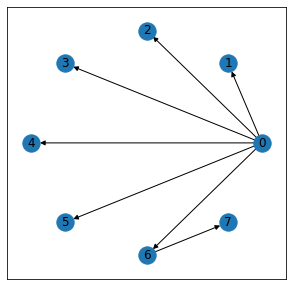

In [29]:
tan = TAN(alpha = 1, starting_node= 0)
tan.fit(X1,y1) # model fitting
print(tan.predict_proba(X1)) # predict prob
print(tan.score(X1,y1)) # fitting accuracy
tan.plot_tree_structure() # plot tree structure

[[0.79478489 0.20521511]
 [0.92164542 0.07835458]
 [0.93062117 0.06937883]
 ...
 [0.24572276 0.75427724]
 [0.156088   0.843912  ]
 [0.74886083 0.25113917]]
0.8617801047120419


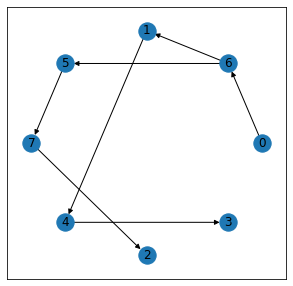

In [28]:
stan = STAN(alpha = 1,starting_node = 0)
stan.fit(X1,y1,M1) # need M1 as extra parameter for contact matrix
print(stan.predict_proba(X1))
print(stan.score(X1,y1))
stan.plot_tree_structure()

In [30]:
etan = STAN_TAN_bagging(alpha = 1) # use both mutual information and contact matrix
etan.fit(X1,y1,M1) # need M1 as extra parameter for contact matrix
print(etan.predict_proba(X1))
print(etan.score(X1,y1))

[[0.81016409 0.18983591]
 [0.91719722 0.08280278]
 [0.93259796 0.06740204]
 ...
 [0.2450244  0.7549756 ]
 [0.18468793 0.81531207]
 [0.75405942 0.24594058]]
0.8722513089005236


# Cross Validation

Compare classifiers using 10-fold-stratified CV.





*   1.   Naive Bayes
    2.   Logistic Regression without Interaction
    3.   Logistic Regression without Interaction, L1 penalty
*   4.   Logistic Regression with Interaction determined by the contact matrix.
    5.   Logistic Regression with Interaction determined by the contact matrix, L1 penalty
    6.   TAN
    7.   STAN

*   8.   ETAN

regularized regression approach with the contact matrix involved in the penalty.



##### Code

In [0]:
def Findparent(M):
      M = M.copy()
      np.fill_diagonal(M,0)  
      p = int(M.shape[0])  
      V = range(p)  # set of all nodes
      st = 0
      Vnew = [st] # vertex that already found their parent. intitiate it with starting node. TAN randomly choose one
      parent = {st:None} # use a dict to show nodes' interdepedency
      while set(Vnew) != set(V):   # when their are still nodes whose parents are unknown.
        index_i = [] # after for loop, has same length as Vnew, shows the closest node that not in Vnew with Vnew.  
        max_inf = [] # corresponding distance
        for i in range(len(Vnew)):  ## can be paralelled 
          vnew = Vnew[i]
          ListToSorted = [int(e) for e in M[:,vnew]]
          index = sorted(range(len(ListToSorted)),key = lambda k: ListToSorted[k],reverse = True)
          index_i.append([ele for ele in index if ele not in Vnew][0]) 
          max_inf.append(M[index_i[-1],vnew])
      
        index1 = sorted(range(len(max_inf)),key = lambda k: max_inf[k],reverse = True)[0] # relative position, Vnew[v1,v2] index_i[v4,v5] max_inf[s1,s2] index1 is the position in those 3 list
        Vnew.append(index_i[index1]) # add in that node
        parent[index_i[index1]] = Vnew[index1] # add direction, it has to be that the new added node is child, otherwise some nodes has 2 parents which is wrong.
      
      # plot tree
      egdes = [(k,v) for v,k in parent.items() if k is not None]
      G = nx.MultiDiGraph()
      G.add_edges_from(egdes)
      plt.figure(figsize = (5,5))
      nx.draw_networkx(G,nx.shell_layout(G))
      return parent


def get_cv(cls,X,Y,M,n_splits=10,verbose = True, interact = True,**kwargs):  
  """ Cross validation to get CLL and accuracy and training time and precision and recall.
  """

  cv = StratifiedKFold(n_splits= n_splits, shuffle=True, random_state=42) # The folds are made by preserving the percentage of samples for each class.
  X,Y = check_X_y(X,Y)
  if isinstance(cls(), LogisticRegressionCV) or isinstance(cls(), LogisticRegression): # 
    X_df = pd.DataFrame(X,columns=['b'+str(i) for i in range(8)]) # to df
    if interact:
      IA = Findparent(M)
      IA = ['C(b'+str(i)+'):C('+ 'b'+str(j)+')' for i,j in IA.items() if i is not 0]
      formula = '+'.join(['C(b'+str(i)+')' for i in range(8)])  + ''.join(['+'+elem for elem in IA])
      # cat encode
      X = dmatrix(formula, X_df,return_type= 'dataframe')
      # build model, use CV to find 
      model = cls(**kwargs)
    else:
      formula = '+'.join(['C(b'+str(i)+')' for i in range(8)]) 
      # cat encode
      X = dmatrix(formula, X_df,return_type= 'dataframe')
      # build model, use CV to find 
      model = cls(**kwargs)
  
  model = cls()
  Accuracy = []
  #Precision = []
  #Recall = []
  # CLL = []
  #training_time = []
  F1 = []
  
  for folder, (train_index, val_index) in enumerate(cv.split(X, Y)): # X,Y are array, data is list
    y_train,y_val = Y[train_index],Y[val_index]
    if isinstance(cls(), LogisticRegressionCV) or isinstance(cls(), LogisticRegression): 
      X_train,X_val = X.iloc[train_index,:],X.iloc[val_index,:]
      model.fit(X_train,y_train) 
    else:
      X_train,X_val = X[train_index],X[val_index]
      model.fit(X_train,y_train,M) # whether data is list or array does not matter, only thing matters is label has to be same.

    Accuracy.append(accuracy_score(y_val, model.predict(X_val) ))
    # CLL.append(model.Conditional_log_likelihood_general(y_val,model.predict_proba(X_val), model.classes_ ) )
    #Precision.append(precision_score(y_val, model.predict(X_val), average='macro') )  
    #Recall.append(recall_score(y_val, model.predict(X_val), average='macro') ) 
    F1.append(f1_score(y_val, model.predict(X_val), average='macro') ) 
    if verbose:
        print("accuracy in %s fold is %s" % (folder+1,Accuracy[-1] ) )
        #print("CLL in %s fold is %s" % (folder+1,CLL[-1]))
        #print("precision in %s fold is %s" % (folder+1,Precision[-1]))
        #print("recall in %s fold is %s" % (folder+1,Recall[-1]))
        print("f1 in %s fold is %s" % (folder+1,F1[-1]))
        #print("training time in %s fold is %s" % (folder+1,training_time[-1]))
        print(10*'__')
    
  return Accuracy,F1


### Lactamase

In [47]:
Accuracy,F1 = get_cv(NB,X2,y2,M2,verbose=False)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

0.8350974025974027 +/- 0.02390300666111667
0.6604837505916049 +/- 0.0692982685872787


In [48]:
Accuracy,F1 = get_cv(cls = LogisticRegression, X= X2,Y=y2,M=M2, interact = False,verbose = False,
                     penalty='none', dual=False, tol=0.0001, fit_intercept=False,
                         class_weight=None, random_state=1, solver='lbfgs', max_iter=100, 
                         multi_class='auto', warm_start=False, n_jobs=None, l1_ratio=None)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

0.8532467532467531 +/- 0.020722324703156533
0.7384217054851148 +/- 0.045101167764690524


In [49]:
Accuracy,F1 = get_cv(cls = LogisticRegressionCV,X= X2,Y=y2,M=M2,interact = False,verbose = False,
                     Cs=6, fit_intercept=False, cv=5, dual=False, penalty='l1', 
                     tol=0.0001, max_iter=100, solver='liblinear', refit=True, intercept_scaling=1.0, random_state=1, l1_ratios=None)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

0.8604545454545454 +/- 0.023287075962823166
0.7612882233037234 +/- 0.04861994310363102


0.9093831168831169 +/- 0.028007438986031006
0.8468862575159953 +/- 0.05679479968098102


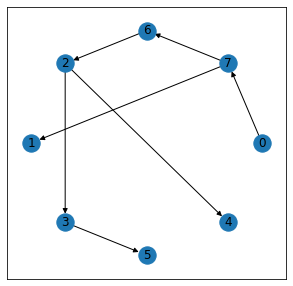

In [50]:
Accuracy,F1 = get_cv(cls = LogisticRegression, X= X2,Y=y2,M=M2, interact = True,verbose = False,
                     penalty='none', dual=False, tol=0.0001, fit_intercept=False,
                         class_weight=None, random_state=1, solver='lbfgs', max_iter=100, 
                         multi_class='auto', warm_start=False, n_jobs=None, l1_ratio=None)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

0.905746753246753 +/- 0.034205450742770635
0.8448971977172665 +/- 0.05319656617646932


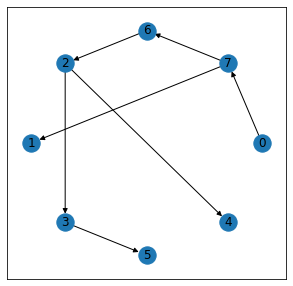

In [51]:
Accuracy,F1 = get_cv(cls = LogisticRegressionCV,X= X2,Y=y2,M=M2,interact = True,verbose = False,
                     Cs=6, fit_intercept=False, cv=5, dual=False, penalty='l1', 
                     tol=0.0001, max_iter=100, solver='liblinear', refit=True, intercept_scaling=1.0, random_state=1, l1_ratios=None)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

In [52]:
Accuracy,F1 = get_cv(TAN,X2,y2,M2,verbose=False)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

0.8857467532467531 +/- 0.046797068658350156
0.8022699381256869 +/- 0.0845854800201869


In [53]:
Accuracy,F1 = get_cv(STAN,X2,y2,M2,verbose=False)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

0.8893181818181818 +/- 0.032289267103993005
0.8051397350143658 +/- 0.06525825349421391


In [54]:
Accuracy,F1 = get_cv(STAN_TAN_bagging,X2,y2,M2,verbose=False)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

0.8930194805194805 +/- 0.03506831693648317
0.8082104234351238 +/- 0.06921581282313918


### P450

In [37]:
Accuracy,F1 = get_cv(NB,X1,y1,M1,verbose=False)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

0.8030921052631579 +/- 0.04260493671515436
0.7643353242392681 +/- 0.05623869751022513


In [34]:
Accuracy,F1 = get_cv(cls = LogisticRegression, X= X1,Y=y1,M=M1, interact = False,verbose = False,
                     penalty='none', dual=False, tol=0.0001, fit_intercept=False,
                         class_weight=None, random_state=1, solver='lbfgs', max_iter=100, 
                         multi_class='auto', warm_start=False, n_jobs=None, l1_ratio=None)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

0.8135307017543859 +/- 0.049200215090727396
0.7865497623347013 +/- 0.057425338345746466


In [39]:
Accuracy,F1 = get_cv(cls = LogisticRegressionCV,X= X1,Y=y1,M=M1,interact = False,verbose = False,
                     Cs=6, fit_intercept=False, cv=5, dual=False, penalty='l1', 
                     tol=0.0001, max_iter=100, solver='liblinear', refit=True, intercept_scaling=1.0, random_state=1, l1_ratios=None)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

0.8146381578947368 +/- 0.04830501850162455
0.7814649300200376 +/- 0.06218667854147827


0.8438815789473683 +/- 0.045593676926236684
0.8234125706427596 +/- 0.05189650899675834


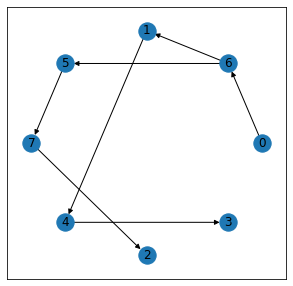

In [40]:
Accuracy,F1 = get_cv(cls = LogisticRegression, X= X1,Y=y1,M=M1, interact = True,verbose = False,
                     penalty='none', dual=False, tol=0.0001, fit_intercept=False,
                         class_weight=None, random_state=1, solver='lbfgs', max_iter=100, 
                         multi_class='auto', warm_start=False, n_jobs=None, l1_ratio=None)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

0.8366118421052631 +/- 0.04672006044079531
0.8111438444305398 +/- 0.05892047103231413


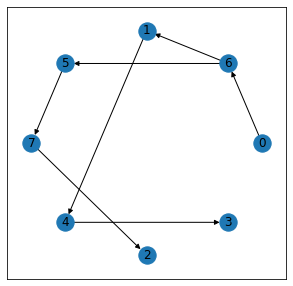

In [42]:
Accuracy,F1 = get_cv(cls = LogisticRegressionCV,X= X1,Y=y1,M=M1,interact = True,verbose = False,
                     Cs=6, fit_intercept=False, cv=5, dual=False, penalty='l1', 
                     tol=0.0001, max_iter=100, solver='liblinear', refit=True, intercept_scaling=1.0, random_state=1, l1_ratios=None)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

In [43]:
Accuracy,F1 = get_cv(TAN,X1,y1,M1,verbose=False)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

0.8428837719298246 +/- 0.042267040326305336
0.8266783872761833 +/- 0.04384578888850275


In [44]:
Accuracy,F1 = get_cv(STAN,X1,y1,M1,verbose=False)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

0.836578947368421 +/- 0.04453364262537665
0.8121718017800343 +/- 0.05193434882735014


In [58]:
Accuracy,F1 = get_cv(TAN_bagging,X1,y1,M1,verbose=False)
print("%s +/- %s" % (np.mean(Accuracy), np.std(Accuracy) ) )
print("%s +/- %s" % (np.mean(F1), np.std(F1) ) )

0.85125 +/- 0.04087801651907419
0.834927671391052 +/- 0.042123063302941514


# Table

![alt text](https://drive.google.com/uc?id=1exYMvEM7Sh7O-BLJ-4t7e1mM6mXGROcI)